Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 735s 939ms/step - accuracy: 0.2108 - loss: 2.1955 - val_accuracy: 0.4600 - val_loss: 1.6211
Epoch 2/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 15:43 1s/step - accuracy: 0.3281 - loss: 1.7654

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 143s 182ms/step - accuracy: 0.3281 - loss: 1.7654 - val_accuracy: 0.4607 - val_loss: 1.6206
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 757s 970ms/step - accuracy: 0.4058 - loss: 1.6901 - val_accuracy: 0.4977 - val_loss: 1.4767
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 143s 182ms/step - accuracy: 0.5312 - loss: 1.4745 - val_accuracy: 0.4960 - val_loss: 1.4767
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 776s 966ms/step - accuracy: 0.4490 - loss: 1.5763 - val_accuracy: 0.5159 - val_loss: 1.4071
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 143s 182ms/step - accuracy: 0.4062 - loss: 1.5920 - val_accuracy: 0.5164 - val_loss: 1.4069
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 780s 967ms/step - accuracy: 0.4749 - loss: 1.5086 - val_accuracy: 0.5314 - val_loss: 1.3645
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 143s 182ms/step - accuracy: 0.5000 - loss: 1.3878 - val_accuracy: 0.5303 - val_loss: 1.3645
Epoch 9/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 779s 966ms/step - accuracy: 0.4892 - loss: 1.46

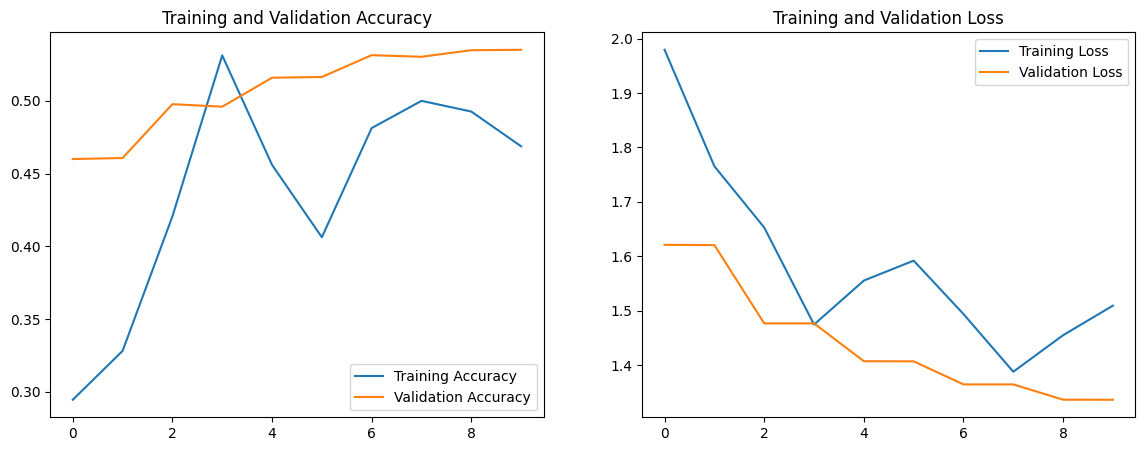

In [3]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Flatten, Dropout
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels (CIFAR-10 has 10 classes)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Load VGG16 model pre-trained on ImageNet, without the top layers (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False)

# Freeze the layers of VGG16 to avoid retraining
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = Sequential()

# Define input shape for sequential model
model.add(InputLayer(input_shape=(32, 32, 3)))

# Add the VGG16 base model
model.add(base_model)

# Flatten the output from VGG16's convolutional layers
model.add(Flatten())

# Add a fully connected layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))

# Add a dropout layer for regularization
model.add(Dropout(0.5))

# Add output layer with 10 units (for 10 classes) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Data augmentation to reduce overfitting
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the model using data augmentation
batch_size = 64
epochs = 10
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

# Plot Training vs Validation Accuracy
plt.figure(figsize=(14, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Save the plot to a file
plt.savefig('./boo.png')

# Show the plot
plt.show()
